In [1]:
import plot_utils
import matplotlib.pyplot as plt
import numpy as np

TITLE_FONT = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
smaller_font = {'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'normal'}
tiny_fontsize = 8
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

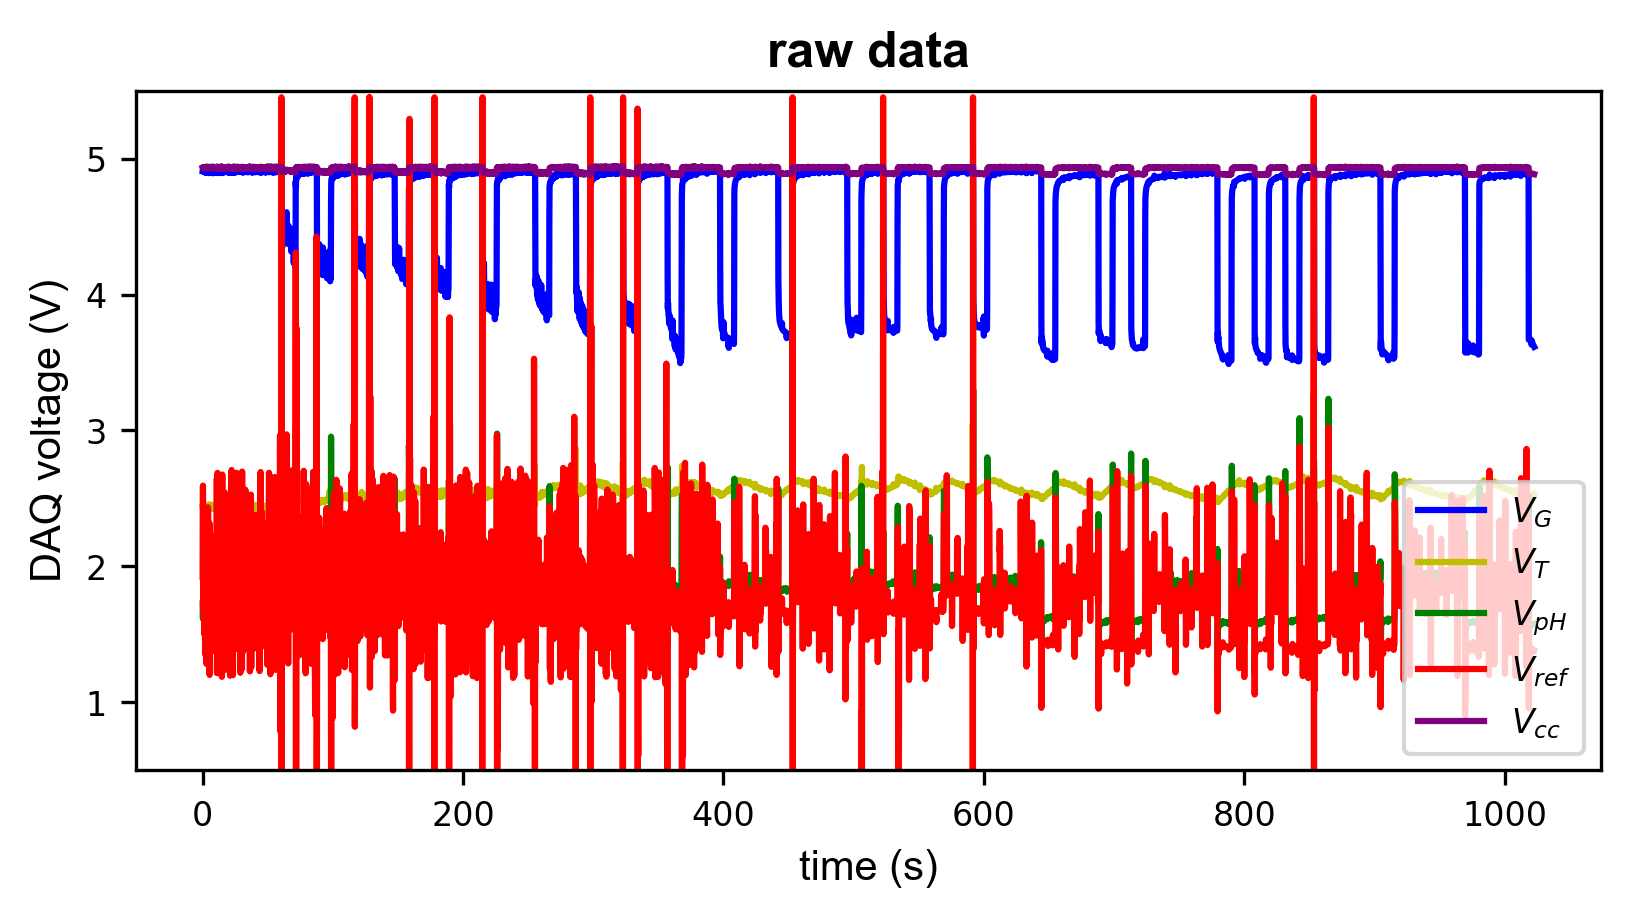

In [2]:
time, G, pH, RTD1, RTD2, VCC, Vref, data = plot_utils.load_raw_data("Data/0518-4--pH--G--T.npy")
# plt.plot(time, pH, label = "pH voltage")

plt.rcParams["figure.figsize"] = (6.3, 3)
colors = ["b", "y", "g", "r", "Purple", "Brown"]
data_to_plot = [G, RTD1, pH, Vref, VCC]
name = ["$V_{G}$", "$V_{T}$", "$V_{pH}$", "$V_{ref}$", "$V_{cc}$"]

for index, datum in enumerate(data_to_plot):
    plt.plot(time, datum, label = name[index], color = colors[index])
    
plt.title("raw data", **TITLE_FONT)
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("DAQ voltage (V)", **smaller_font)
plt.ylim([0.5, 5.5])
plt.xticks(fontsize = tiny_fontsize)
plt.yticks(fontsize = tiny_fontsize)
plt.legend(fontsize = tiny_fontsize, loc = "lower right")

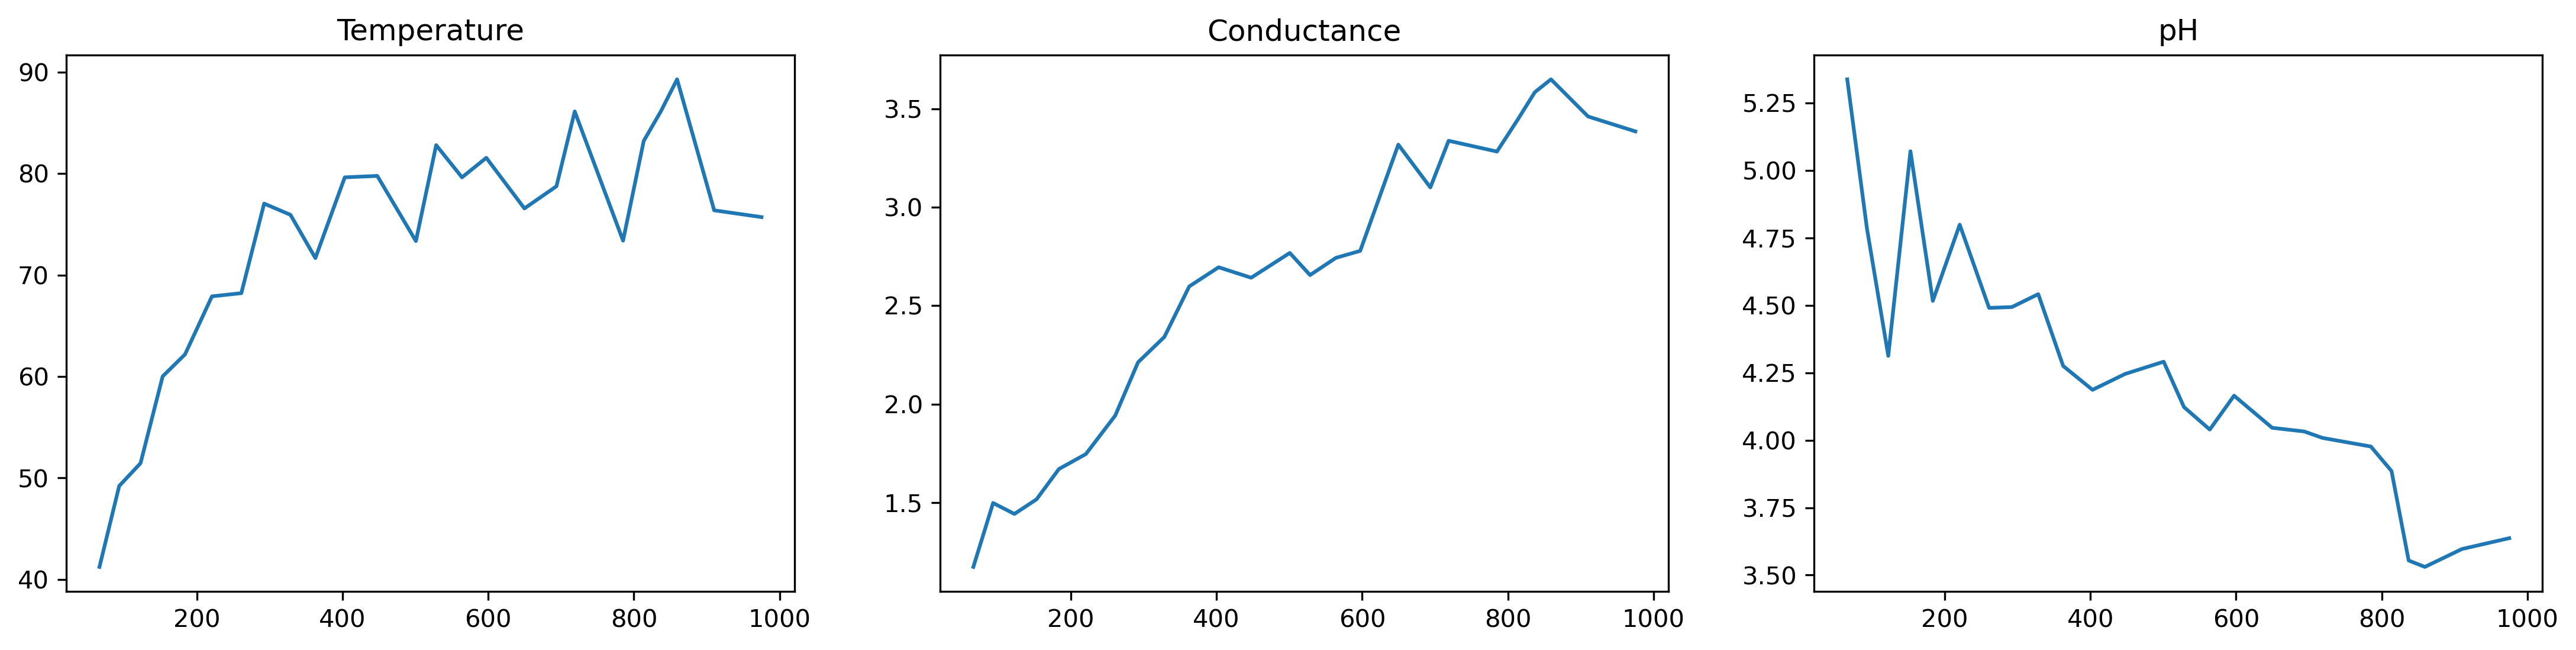

In [3]:
t_point, T_point, G_point, pH_point = plot_utils.analyse_and_plot("Data/0518-4--pH--G--T.npy")

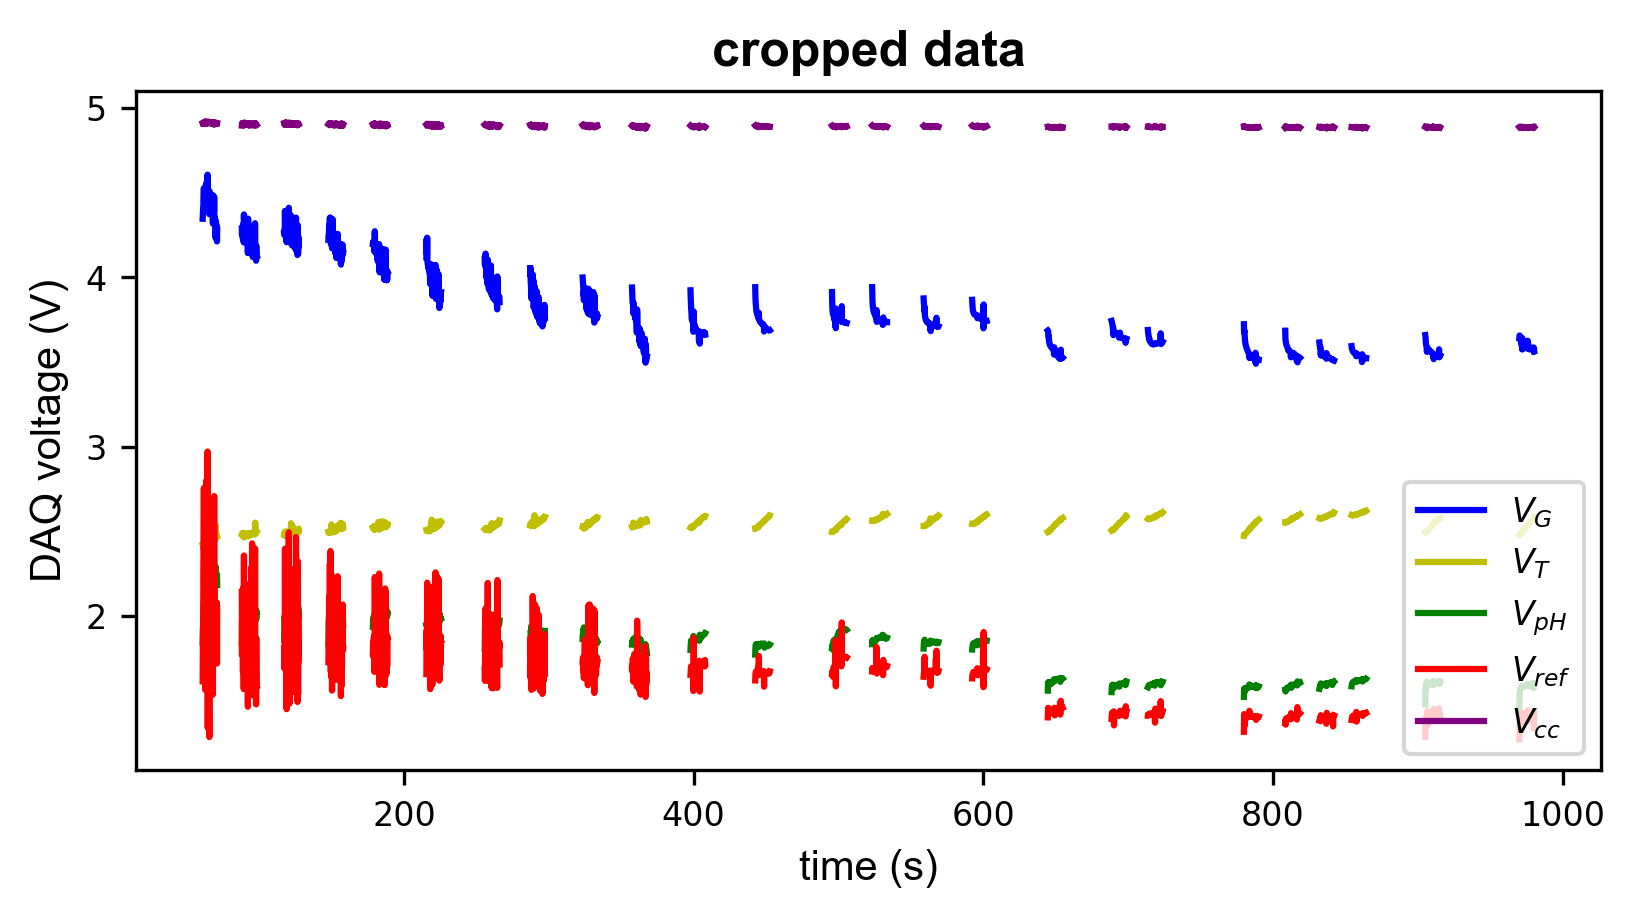

In [4]:
segments = plot_utils.find_segment(G)
colors = ["b", "y", "g", "r", "Purple", "Brown"]
data_to_plot = [G, RTD1, pH, Vref, VCC]
name = ["$V_{G}$", "$V_{T}$", "$V_{pH}$", "$V_{ref}$", "$V_{cc}$"]
plt.rcParams["figure.figsize"] = (6.3, 3)

for index, datum in enumerate(data_to_plot):
    plt.plot(time[segments[0][0]:segments[0][1]], datum[segments[0][0]:segments[0][1]], label = name[index], color = colors[index])
    for segment in segments[1:]:
        plt.plot(time[segment[0]:segment[1]], datum[segment[0]:segment[1]], color = colors[index])

plt.title("cropped data", **TITLE_FONT)
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("DAQ voltage (V)", **smaller_font)
plt.xticks(fontsize = tiny_fontsize)
plt.yticks(fontsize = tiny_fontsize)
plt.legend(fontsize = tiny_fontsize, loc = "lower right")

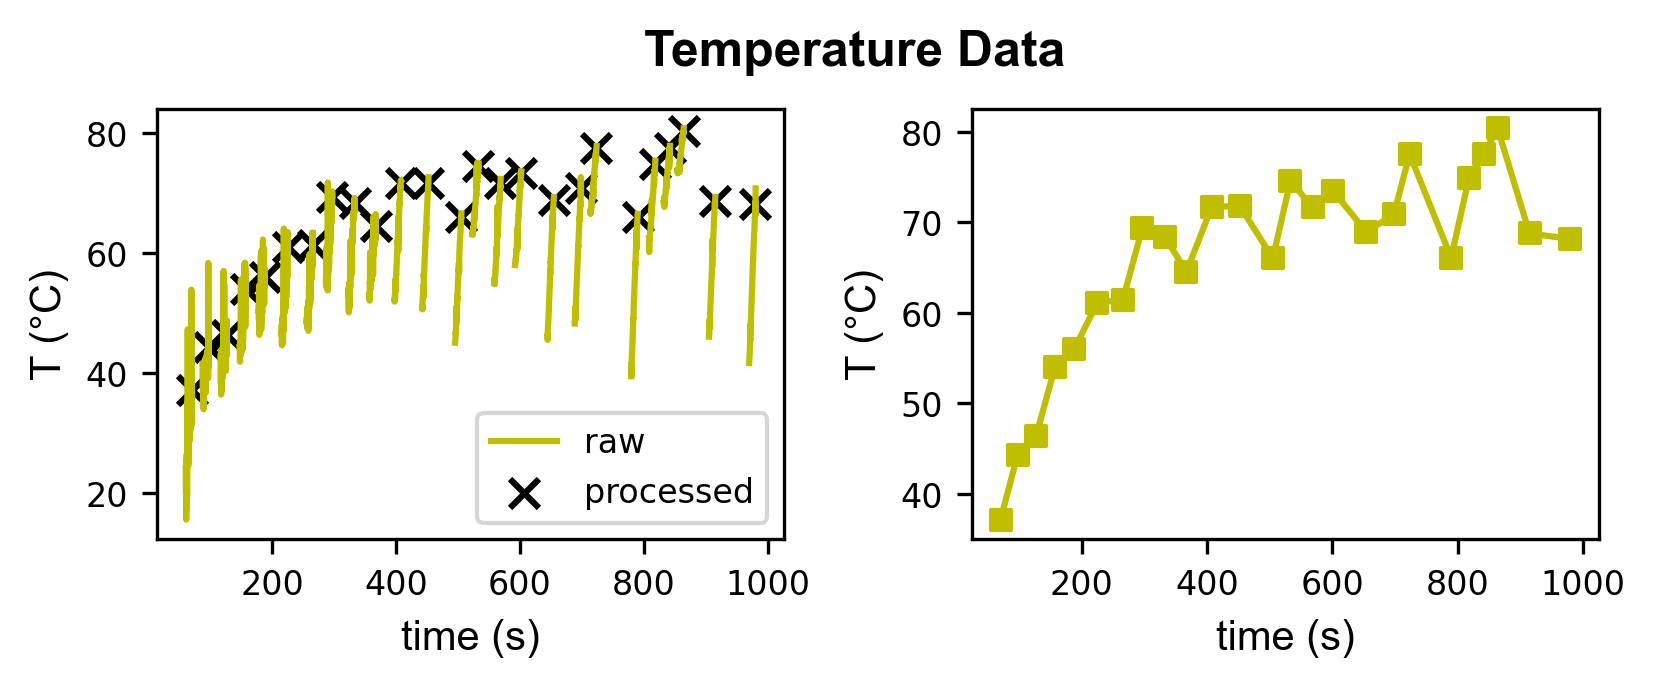

In [5]:
T = np.log(RTD1/(VCC - RTD1)*1.1)/np.log(1.003)
backwards = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.2, 1.9))

ax1.plot(time[segments[0][0]:segments[0][1]], T[segments[0][0]:segments[0][1]], label = "raw", color = "y")

for segment in segments[1:]:
    ax1.plot(time[segment[0]:segment[1]], T[segment[0]:segment[1]], color = "y")
    
t_point = [np.average(time[segment[1] - backwards:segment[1]]) for segment in segments]
T_point = [np.average(T[segment[1] - backwards:segment[1]]) for segment in segments]

ax1.scatter(t_point, T_point, marker = 'x', color = "Black", s = 48, label = "processed")
ax1.set_xlabel("time (s)", **smaller_font)
ax1.set_ylabel("T (°C)", **smaller_font)
ax1.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
ax1.legend(fontsize = tiny_fontsize)
ax2.plot(t_point, T_point, color = "y")
ax2.scatter(t_point, T_point, marker = 's', color = "y", s = 24)
ax2.set_xlabel("time (s)", **smaller_font)
ax2.set_ylabel("T (°C)", **smaller_font)
ax2.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.suptitle('Temperature Data', **TITLE_FONT, y = 1.02)
plt.subplots_adjust(wspace = 0.3)

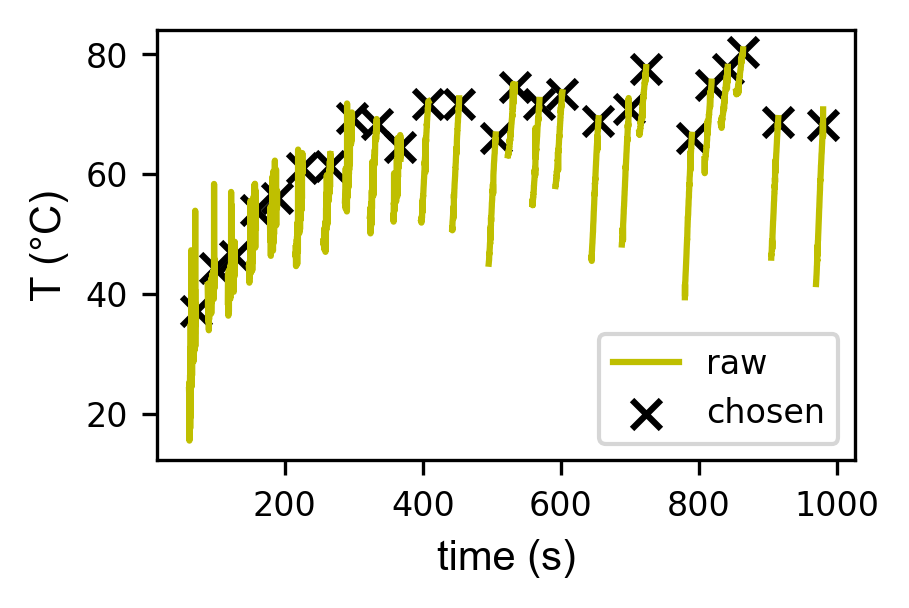

In [6]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(time[segments[0][0]:segments[0][1]], T[segments[0][0]:segments[0][1]], label = "raw", color = "y")

for segment in segments[1:]:
    plt.plot(time[segment[0]:segment[1]], T[segment[0]:segment[1]], color = "y")
    
plt.scatter(t_point, T_point, marker = 'x', color = "Black", s = 48, label = "chosen")
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("T (°C)", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.legend(fontsize = tiny_fontsize)

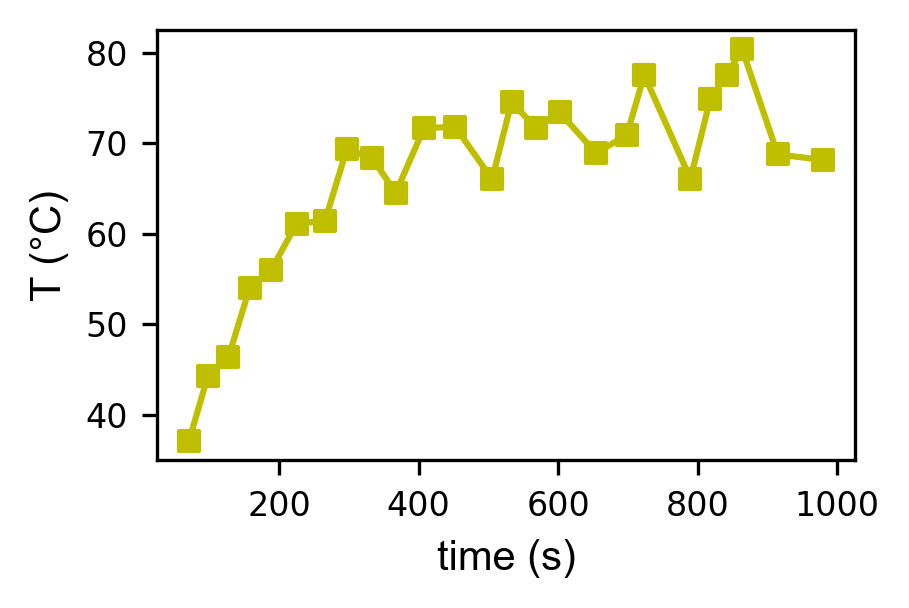

In [7]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(t_point, T_point, color = "y")
plt.scatter(t_point, T_point, marker = 's', color = "y", s = 24)
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("T (°C)", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)

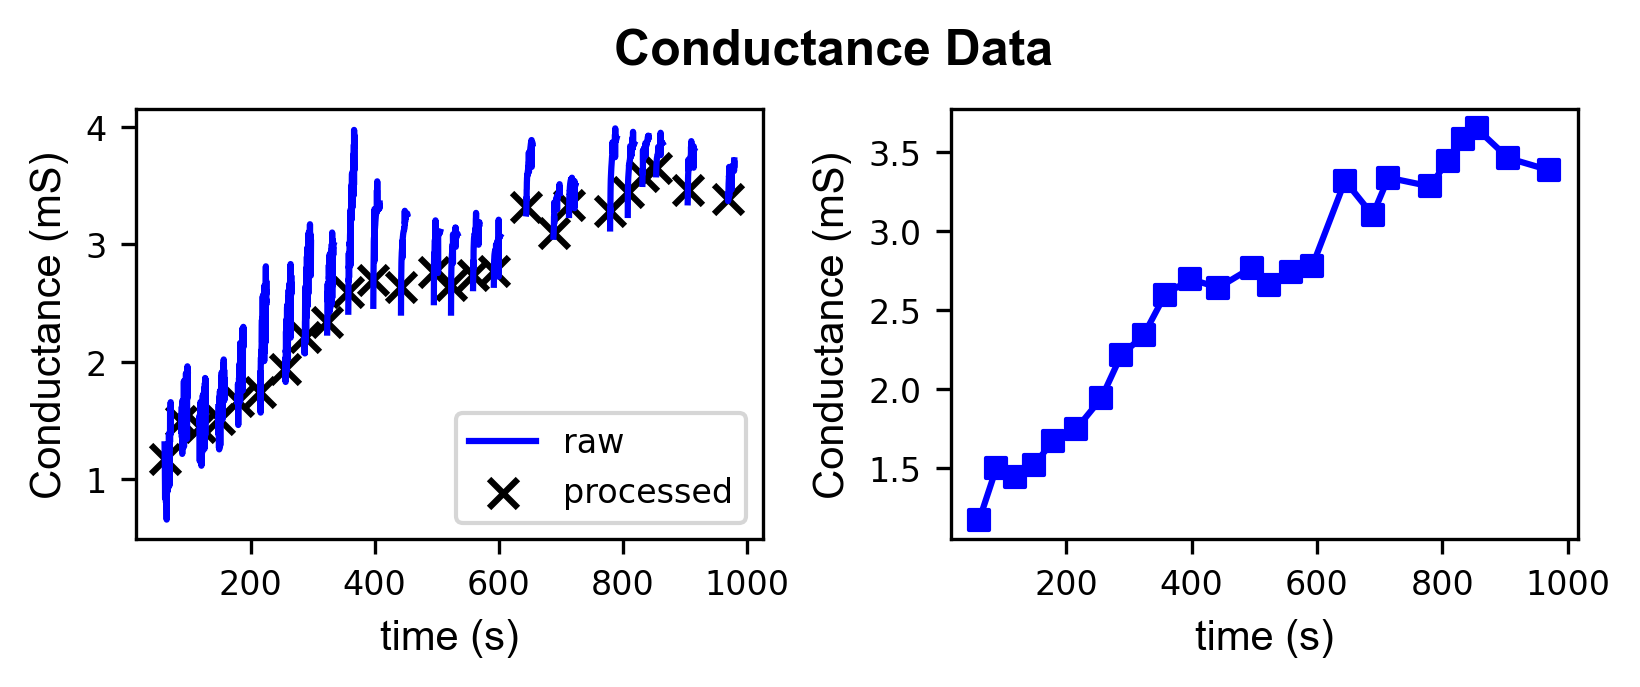

In [8]:
G_value = (VCC - G) / (G *100) * 1000

forwards = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.2, 1.9))

ax1.plot(time[segments[0][0]:segments[0][1]], G_value[segments[0][0]:segments[0][1]], label = "raw", color = "b")

for segment in segments[1:]:
    ax1.plot(time[segment[0]:segment[1]], G_value[segment[0]:segment[1]], color = "b")
    
t_point = [np.average(time[segment[0]:segment[0] + forwards]) for segment in segments]
G_point = [np.average(G_value[segment[0]:segment[0] + forwards]) for segment in segments]

ax1.scatter(t_point, G_point, marker = 'x', color = "Black", s = 48, label = "processed")
ax1.set_xlabel("time (s)", **smaller_font)
ax1.set_ylabel("Conductance (mS)", **smaller_font)
ax1.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
ax1.legend(fontsize = tiny_fontsize)
ax2.plot(t_point, G_point, color = "b")
ax2.scatter(t_point, G_point, marker = 's', color = "b", s = 24)
ax2.set_xlabel("time (s)", **smaller_font)
ax2.set_ylabel("Conductance (mS)", **smaller_font)
ax2.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.suptitle('Conductance Data', **TITLE_FONT, y = 1.02)
plt.subplots_adjust(wspace = 0.3)

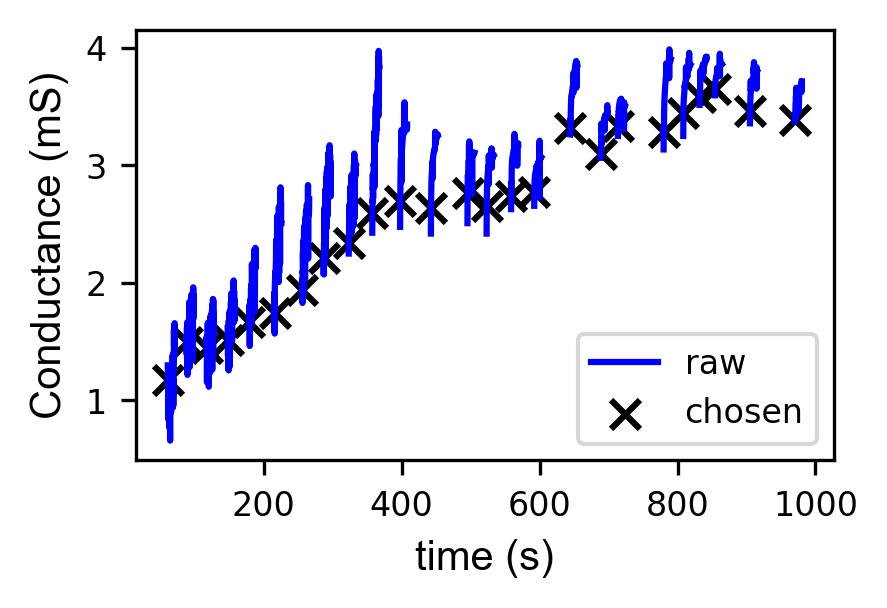

In [9]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(time[segments[0][0]:segments[0][1]], G_value[segments[0][0]:segments[0][1]], label = "raw", color = "b")

for segment in segments[1:]:
    plt.plot(time[segment[0]:segment[1]], G_value[segment[0]:segment[1]], color = "b")
    
plt.scatter(t_point, G_point, marker = 'x', color = "Black", s = 48, label = "chosen")
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("Conductance (mS)", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.legend(fontsize = tiny_fontsize)

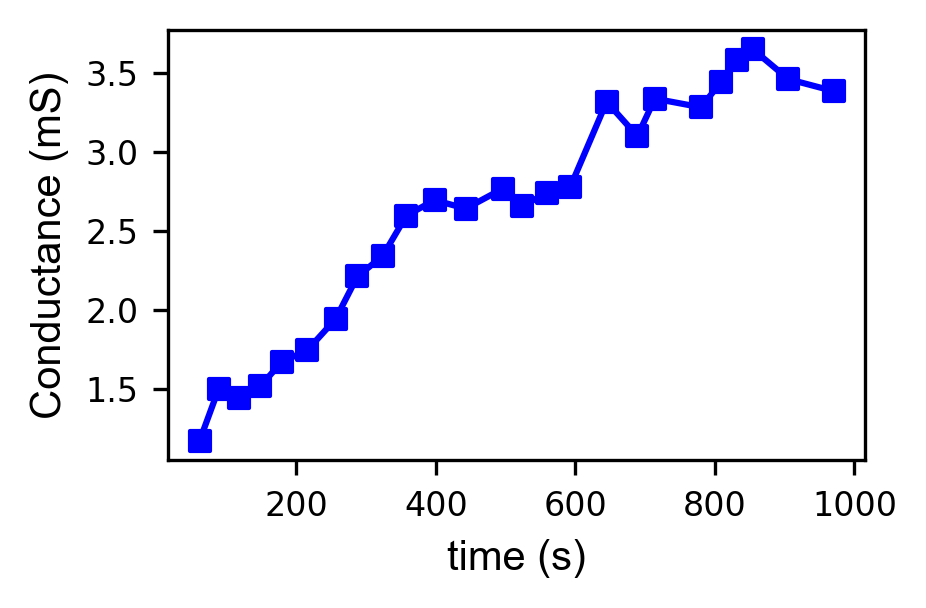

In [10]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(t_point, G_point, color = "b")
plt.scatter(t_point, G_point, marker = 's', color = "b", s = 24)
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("Conductance (mS)", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)

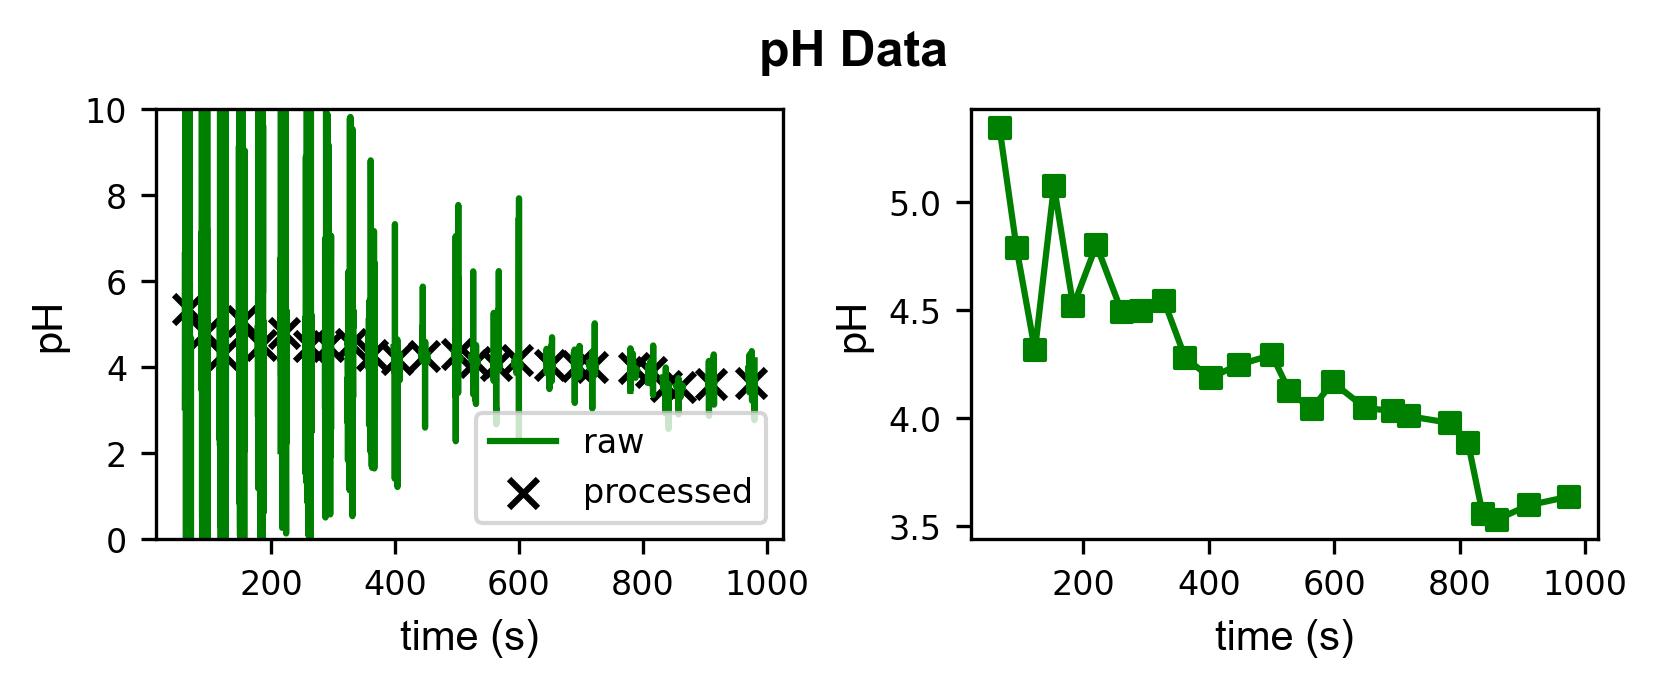

In [11]:
pH_value = (pH - Vref)/-0.058 + 7

backwards = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6.2, 1.9))    
    
ax1.plot(time[segments[0][0]:segments[0][1]], pH_value[segments[0][0]:segments[0][1]], label = "raw", color = "g")

for segment in segments[1:]:
    ax1.plot(time[segment[0]:segment[1]], pH_value[segment[0]:segment[1]], color = "g")
    
t_point = [np.average(time[segment[0]:segment[1]]) for segment in segments]
pH_point = [np.average(pH_value[segment[0]:segment[1]]) for segment in segments]

ax1.scatter(t_point, pH_point, marker = 'x', color = "Black", s = 48, label = "processed")
ax1.set_xlabel("time (s)", **smaller_font)
ax1.set_ylabel("pH", **smaller_font)
ax1.set_ylim([0, 10])
ax1.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
ax1.legend(loc = "lower right", fontsize = tiny_fontsize)
ax2.plot(t_point, pH_point, color = "g")
ax2.scatter(t_point, pH_point, marker = 's', color = "g", s = 24)
ax2.set_xlabel("time (s)", **smaller_font)
ax2.set_ylabel("pH", **smaller_font)
ax2.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.suptitle('pH Data', **TITLE_FONT, y = 1.02)
plt.subplots_adjust(wspace = 0.3)

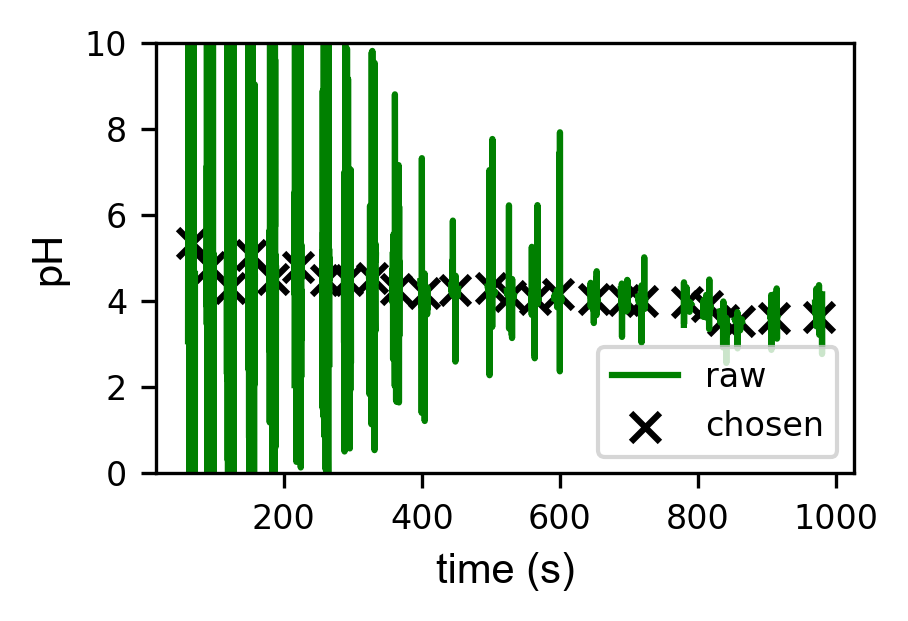

In [12]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(time[segments[0][0]:segments[0][1]], pH_value[segments[0][0]:segments[0][1]], label = "raw", color = "g")

for segment in segments[1:]:
    plt.plot(time[segment[0]:segment[1]], pH_value[segment[0]:segment[1]], color = "g")
    
plt.scatter(t_point, pH_point, marker = 'x', color = "Black", s = 48, label = "chosen")
plt.ylim([0, 10])
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("pH", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)
plt.legend(fontsize = tiny_fontsize, loc = "lower right")

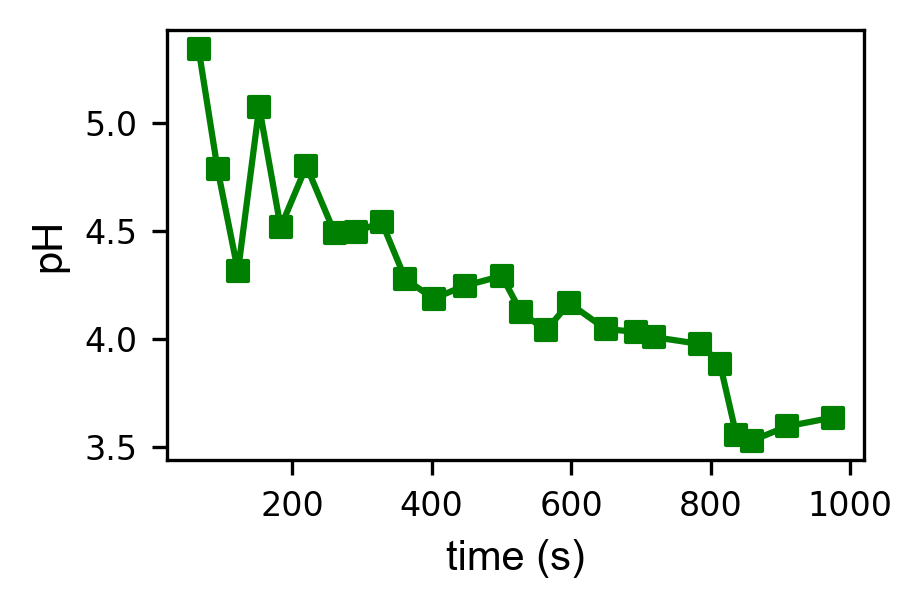

In [13]:
plt.rcParams["figure.figsize"] = (3, 1.9)
plt.plot(t_point, pH_point, color = "g")
plt.scatter(t_point, pH_point, marker = 's', color = "g", s = 24)
plt.xlabel("time (s)", **smaller_font)
plt.ylabel("pH", **smaller_font)
plt.tick_params(axis='both', which='major', labelsize = tiny_fontsize)